In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('~/Downloads/un-general-debates.csv')
df.head(1)

,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...


In [6]:
len(df)

7507

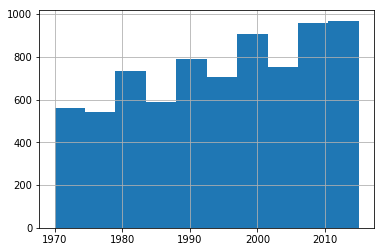

In [7]:
df['year'].hist()

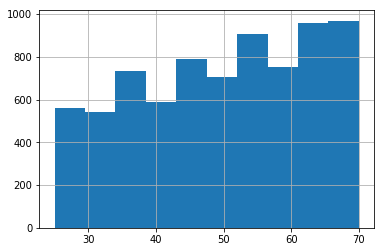

In [8]:
df['session'].hist()

In [10]:
len(df['country'].unique())

199

In [16]:
df.groupby('country')\
    .agg({'session': 'count'})\
    .sort_values('session', ascending=False)\
    .head(5)

,session
country,
MAR,46
NLD,46
SYR,46
SLV,46
ITA,46


In [17]:
df.groupby('country')\
    .agg({'session': 'count'})\
    .sort_values('session', ascending=True)\
    .head(5)

,session
country,
SSD,5
EU,5
MNE,10
VAT,13
TLS,13


In [ ]:
df.groupby('country')\
    .agg({'session': 'count'})\
    .hist()

In [39]:
import re

def word_split(text):
    return re.split('\s', text.lower())

def word_count(text):
    return len(word_split(text.lower()))

df['word_count'] = df['text'].apply(word_count)

In [33]:
df.sort_values('word_count', ascending=False)\
  .head(1)

,session,year,country,text,word_count
2800,64,2009,LBY,"In the \nname of the African Union, I would li...",11737


In [66]:
from collections import Counter

stop_words = ['of', 'the', 'to', 'and', 'a', 'in', 'that', 'is', 'for', 'which', 'it', 'this', 'we', 'be', 'united',\
               'on', 'by', 'as', 'have', 'has', 'nations', 'are', 'its', 'with', 'our', 'not', 'i', 'an', 'all', 'but',\
               'or', 'my', 'they', 'was', 'should', 'those', 'one', 'their', 'will', 'other', 'one', 'can', 'also', 'must',\
               'there', 'such', '', 'if', 'at', 'been', 'more', 'would', 'so', 'us', 'new', 'no', 'there', 'any',\
               'against', 'who', 'only', 'may', 'from', 'many', 'than', 'his', '—']

def word_freq(text):
    counter = Counter(word_split(text))
    for word in stop_words:
        if word in counter:
            del counter[word]
    return counter

freqs_1970 = df.query('year == 1970')\
  ['text'].apply(word_freq)\
  .sum().most_common(25)
freqs_1970

[('international', 1243),
 ('world', 776),
 ('peace', 692),
 ('states', 662),
 ('countries', 603),
 ('development', 516),
 ('these', 510),
 ('general', 502),
 ('organization', 490),
 ('government', 462),
 ('people', 445),
 ('security', 427),
 ('peoples', 413),
 ('economic', 409),
 ('great', 366),
 ('between', 363),
 ('assembly', 361),
 ('charter', 319),
 ('human', 319),
 ('most', 302),
 ('years', 297),
 ('arab', 292),
 ('developing', 291),
 ('now', 280),
 ('national', 280)]

In [67]:
freqs_2015 = df.query('year == 2015')\
  ['text'].apply(word_freq)\
  .sum().most_common(25)
freqs_2015

[('international', 1719),
 ('development', 1316),
 ('security', 1088),
 ('world', 1027),
 ('human', 942),
 ('peace', 906),
 ('people', 846),
 ('global', 817),
 ('countries', 752),
 ('sustainable', 720),
 ('states', 698),
 ('climate', 648),
 ('support', 587),
 ('efforts', 540),
 ('country', 538),
 ('rights', 538),
 ('economic', 506),
 ('general', 467),
 ('years', 465),
 ('like', 460),
 ('agenda', 457),
 ('council', 449),
 ('community', 440),
 ('assembly', 435),
 ('when', 419)]

In [71]:
old_words = set(map(lambda pair: pair[0], freqs_1970)) - set(map(lambda pair: pair[0], freqs_2015))
old_words

{'arab',
 'between',
 'charter',
 'developing',
 'government',
 'great',
 'most',
 'national',
 'now',
 'organization',
 'peoples',
 'these'}

In [72]:
new_words = set(map(lambda pair: pair[0], freqs_2015)) - set(map(lambda pair: pair[0], freqs_1970))
new_words

{'agenda',
 'climate',
 'community',
 'council',
 'country',
 'efforts',
 'global',
 'like',
 'rights',
 'support',
 'sustainable',
 'when'}

In [73]:
for word in new_words:
    df['cnt_' + word] = df['text'].str.count(word)

In [77]:
agg_expr = {'cnt_'+word: 'sum' for word in new_words}

by_year = df.groupby('year', as_index=False).agg(agg_expr)
by_year.head(1)

,year,cnt_sustainable,cnt_support,cnt_rights,cnt_agenda,cnt_community,cnt_like,cnt_global,cnt_council,cnt_country,cnt_climate,cnt_efforts,cnt_when
0,1970,0,296,305,66,191,278,37,2,350,18,243,257


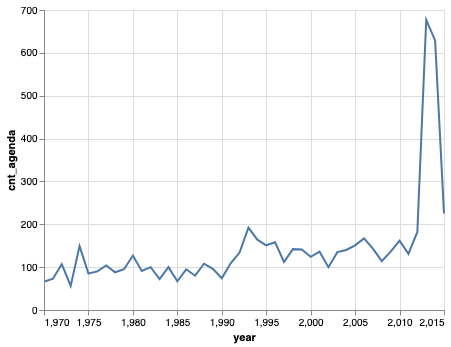

In [82]:
import altair as alt
alt.renderers.enable('notebook')
alt.Chart(by_year).mark_line().encode(x='year', y='cnt_agenda')

In [85]:
by_year.melt(id_vars='year').head(5)

,year,variable,value
0,1970,cnt_sustainable,0
1,1971,cnt_sustainable,0
2,1972,cnt_sustainable,0
3,1973,cnt_sustainable,1
4,1974,cnt_sustainable,0


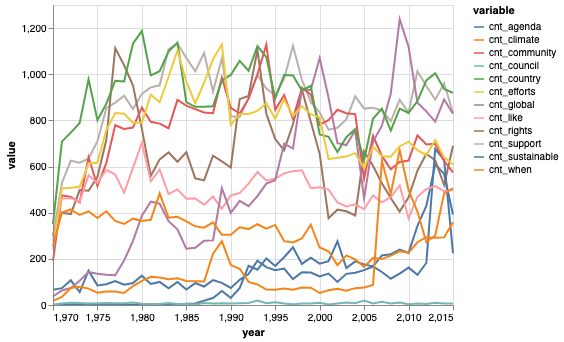

In [95]:
alt.Chart(by_year.melt(id_vars='year'))\
    .mark_line()\
    .encode(x='year', y='value', color='variable', tooltip='variable')